# Lab-2:
# Exercise 1:

> Importing necessary libraries:

In [181]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
sb.set_theme(context="notebook", color_codes=True, style="darkgrid")
sb.set()
%matplotlib inline

> Reading the Dataset:

In [182]:
df = pd.read_csv("pima_indian_diabetes.csv")
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,test
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


#### Question 1: Use the "pima_indians_diabetes.csv" dataset and note down the meta information

> Fields description follow:
>
> * preg = Number of times pregnant
> * plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
> * pres = Diastolic blood pressure (mm Hg)
> * skin = Triceps skin fold thickness (mm)
> * test = 2-Hour serum insulin (mu U/ml)
> * mass = Body mass index (weight in kg/(height in m)^2)
> * pedi = Diabetes pedigree function
> * age = Age (years)
> * class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

#### Question 2: Compute the mean and standard deviation, tabulate and visualize the age of the patient

Mean of age: 33.240885416666664
Standard Deviation of age: 11.76023154067868


Text(0, 0.5, 'Number of patients')

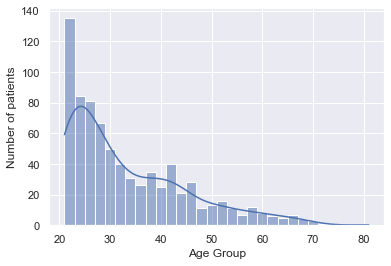

In [183]:
print("Mean of age:",df.age.mean())
print("Standard Deviation of age:",df.age.std())
age_vis = sb.histplot(df.age, bins=30, kde=True)
age_vis.set_xlabel("Age Group")
age_vis.set_ylabel("Number of patients")

> Hence,
> * Mean = 33.24
> * Standard Deviation = 11.76 

#### Question 3: Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

<AxesSubplot:xlabel='mass', ylabel='age'>

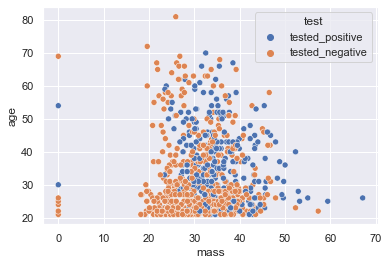

In [184]:
sb.scatterplot(y=df.age, x= df.mass, hue=df.test)

In [185]:
df['bmi_category'] = ''

df.loc[df.mass<18, 'bmi_category'] = 'underweight'
df.loc[((df.mass>=18) & (df.mass<=25)), 'bmi_category'] = 'healthy'
df.loc[((df.mass>25) & (df.mass<30)), 'bmi_category'] = 'overweight'
df.loc[df.mass>30, 'bmi_category'] = 'obese'
df['bins']=pd.cut(df.age, bins=[20,30,40,50,60,70,81])
pd.crosstab(df.bmi_category,df.bins)

bins,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 81]"
bmi_category,,,,,,
,2,3,2,0,0,0
healthy,73,17,6,12,3,1
obese,235,99,88,32,11,0
overweight,98,38,17,9,10,1
underweight,9,0,0,1,1,0


<AxesSubplot:xlabel='mass', ylabel='age'>

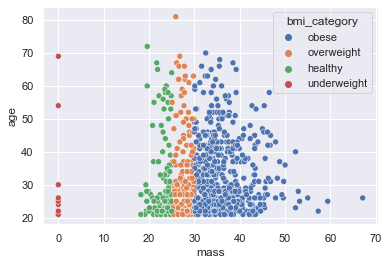

In [186]:
sb.scatterplot(x=df.mass,y=df.age,hue=df.bmi_category)

#### Question 4: Tabulate the class label and comment on whether the classes are balanced.

In [187]:
df.test.value_counts()

tested_negative    500
tested_positive    268
Name: test, dtype: int64

#### Question 5: Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [188]:
x = df.drop(columns=['bins','test','bmi_category'])
y = df.test
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=25)
x_train_scaled = preprocessing.StandardScaler().fit(x_train).transform(x_train)
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [189]:
x_test_scaled = preprocessing.StandardScaler().fit(x_test).transform(x_test)
y_pred = model.predict(x_test_scaled).tolist()
print("Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred))
print("Precision:",precision_score(y_true=y_test,y_pred=y_pred,average="binary",pos_label='tested_positive'))
print("Recall:",recall_score(y_true=y_test,y_pred=y_pred,average="binary",pos_label='tested_positive'))

Accuracy: 0.8051948051948052
Precision: 0.6857142857142857
Recall: 0.676056338028169


#### Question 6: Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

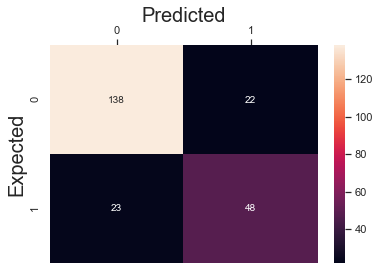

In [190]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax= plt.subplot()
sb.heatmap(conf_mat, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_ylabel('Expected', fontsize=20)
plt.show()

#### Question 7: Compute accuracy rate, true positive and true negative rate and comment on the performance.

In [191]:
tn = conf_mat[0,0]
tp = conf_mat[1,0]
fp = conf_mat[0,1]
fn = conf_mat[1,1]

tpr = tp / (tp+fn)
tnr = tn / (tn+fp)
Accuracy = (tp+tn) / (tp+tn+fp+fn)
print("True Positive Rate = ", tnr)
print("True Negative Rate = ", tnr)
print("Accuracy = ", Accuracy)

True Positive Rate =  0.8625
True Negative Rate =  0.8625
Accuracy =  0.696969696969697


#### Question 8: Visualize the ROC curve, and comment on the performance of the classifier.

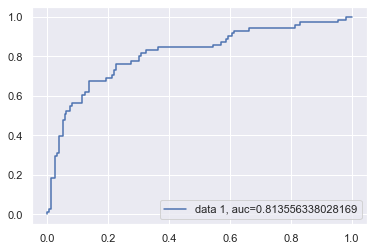

In [192]:
y_test = y_test.map({'tested_negative': 0, 'tested_positive': 1}).astype(int)
y_score = model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_score)
auc = roc_auc_score(y_test, y_score)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

> The ROC_AUC_SCORE is approx. 0.81 which infers that the classification on the dataset is quite valid